In [1]:
from model import CVAE
import numpy as np
device = 'mps'

## Load prediction and satellite data from OBJECTIVE_1 and OBJECTIVE_2 notebook

Ensure you have run notebook OBJECTIVE_1 and OBJECTIVE_2 first to have the saved prediction and satellite images in the repository.

In [4]:
# Load prediction for t+1, t+2, t+3, t+4
predictions_cvae = np.load('data/predictions_cvae.npy')
predictions_lstm = np.load('data/predictions_lstm.npy')

# Load satellite images
observations = np.load('data/observations.npy')

## Load model

In [5]:
# Load model for compression/decompression
dims_latent = 64
ModelClass = CVAE.VariationalAutoencoder(dims_latent)
cvae_model = CVAE.load_model('model_pth/cvae_trained_model_10_epochs.pth', ModelClass, device)

## Data assimilation (LSTM)

Compress the data with encoder.

In [ ]:
prediction_tensor = CVAE.make_tensor(predictions_lstm, device).reshape(-1,1,256,256)
satellite_tensor = CVAE.make_tensor(observations[1:], device).reshape(-1,1,256,256)

In [ ]:
pred_compr = cvae_model.encoder(prediction_tensor).cpu().detach().numpy()
satellite_compr = cvae_model.encoder(satellite_tensor).cpu().detach().numpy()
print("Data shape after compression:", satellite_compr.shape)                                

Data shape after compression: (4, 128)


Compute covariances and matrices

In [ ]:
nNodes = 4
I = np.identity(nNodes)
R = CVAE.covariance_matrix(satellite_compr) # Observation error covariance
H = I # Observation operator
B = CVAE.covariance_matrix(pred_compr) # Background error covariance

Run data assimilation and evaluate in latent space

In [ ]:
import time
print('Start Assimilation')
start = time.time()
updated_data_array = CVAE.data_assimilation(B, H, R, pred_compr, satellite_compr)

mse_before_DA = CVAE.mse(satellite_compr.T, pred_compr.T)
mse_after_DA = CVAE.mse(satellite_compr.T, updated_data_array)
                   
end = time.time() 
print('MSE before assimilation: ', mse_before_DA)
print('MSE after assimilation: ', mse_after_DA)
print(f'Time for assimilation: {end-start} seconds')

Start Assimilation
MSE before assimilation:  1.012793
MSE after assimilation:  0.47915458890582074
Time for assimilation: 0.002980947494506836 seconds


Reconstruct the data and calculate physical MSE

In [ ]:
# Reconstruct prediction
recon = CVAE.reconstruct(updated_data_array, cvae_model)

In [ ]:
# Calculate the MSE between reconstructed data and satellite data
mse_before = CVAE.mse(observations, predictions_lstm)
print(f'Physical space MSE before DA: {mse_before}')
physical_mse = CVAE.mse(observations, recon)
print(f'Physical space MSE after DA: {physical_mse}')

Physical space MSE before DA: 0.08314240149141097
Physical space MSE after DA: 0.06987785315434537


The MSE has decreased after data assimilation. Results displayed below.

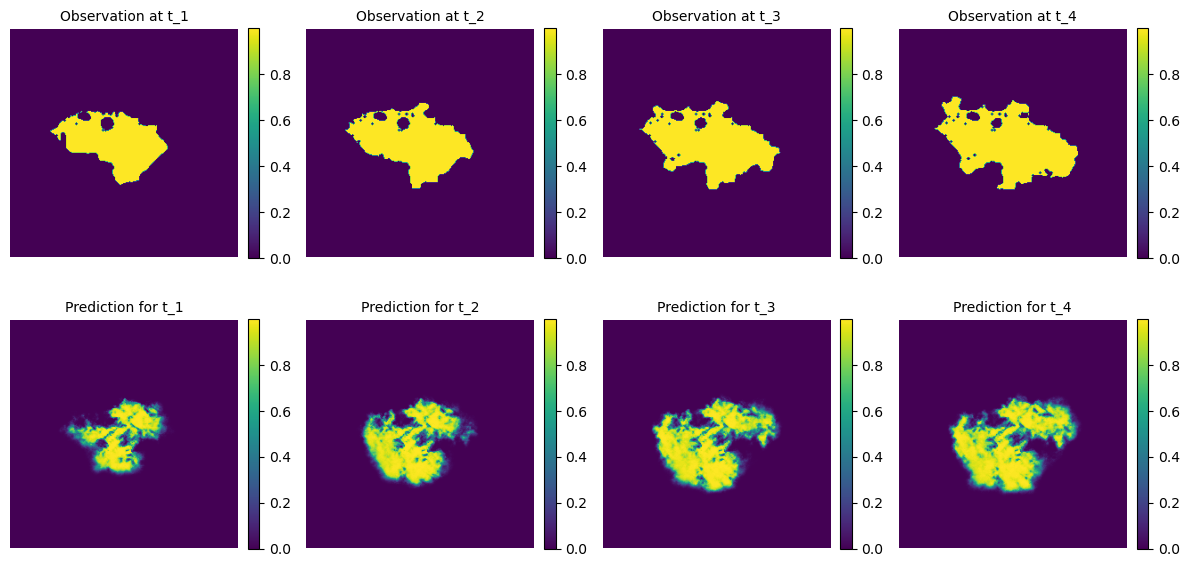

In [ ]:
CVAE.visualise_results(4, recon, observations, ts=[0,1,2,3])

Compress the data with encoder.

In [10]:
prediction_tensor = CVAE.make_tensor(predictions_lstm, device).reshape(-1,1,256,256)
satellite_tensor = CVAE.make_tensor(observations[1:], device).reshape(-1,1,256,256)

In [11]:
pred_compr = cvae_model.encoder(prediction_tensor).cpu().detach().numpy()
satellite_compr = cvae_model.encoder(satellite_tensor).cpu().detach().numpy()
print("Data shape after compression:", satellite_compr.shape)                                

Data shape after compression: (4, 128)


Compute covariances and matrices

In [12]:
nNodes = 4
I = np.identity(nNodes)
R = CVAE.covariance_matrix(satellite_compr) # Observation error covariance
H = I # Observation operator
B = CVAE.covariance_matrix(pred_compr) # Background error covariance

Run data assimilation and evaluate in latent space

In [13]:
import time
print('Start Assimilation')
start = time.time()
updated_data_array = CVAE.data_assimilation(B, H, R, pred_compr, satellite_compr)

mse_before_DA = CVAE.mse(satellite_compr.T, pred_compr.T)
mse_after_DA = CVAE.mse(satellite_compr.T, updated_data_array)
                   
end = time.time() 
print('MSE before assimilation: ', mse_before_DA)
print('MSE after assimilation: ', mse_after_DA)
print(f'Time for assimilation: {end-start} seconds')

Start Assimilation
MSE before assimilation:  1.012793
MSE after assimilation:  0.47915458890582074
Time for assimilation: 0.002980947494506836 seconds


Reconstruct the data and calculate physical MSE

In [14]:
# Reconstruct prediction
recon = CVAE.reconstruct(updated_data_array, cvae_model)

In [16]:
# Calculate the MSE between reconstructed data and satellite data
mse_before = CVAE.mse(observations, predictions_lstm)
print(f'Physical space MSE before DA: {mse_before}')
physical_mse = CVAE.mse(observations, recon)
print(f'Physical space MSE after DA: {physical_mse}')

Physical space MSE before DA: 0.08314240149141097
Physical space MSE after DA: 0.06987785315434537


The MSE has decreased after data assimilation. Results displayed below.

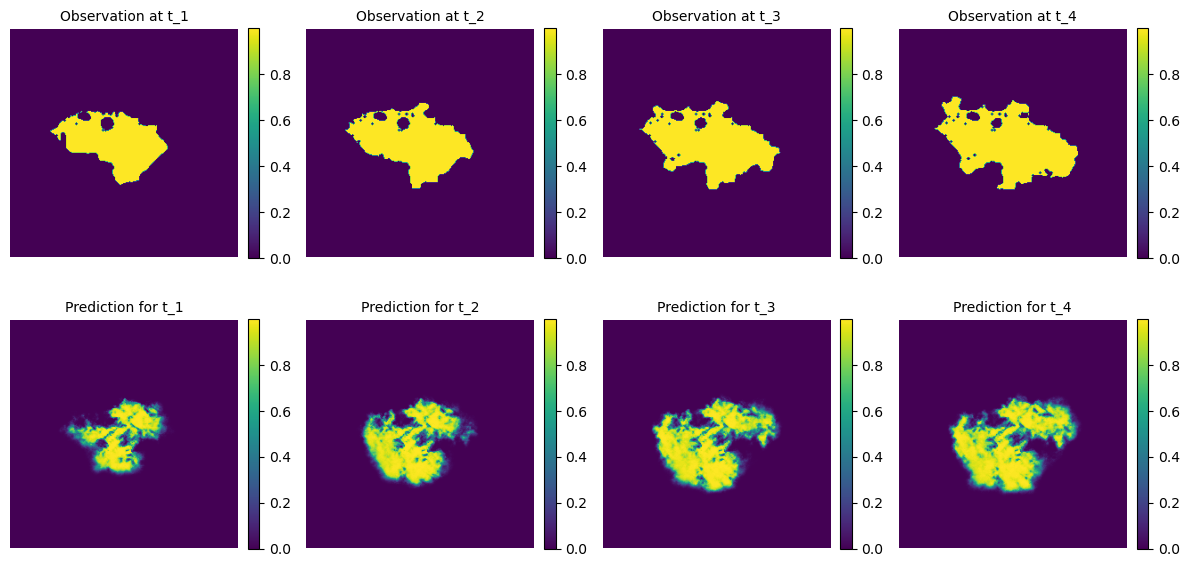

In [17]:
CVAE.visualise_results(4, recon, observations, ts=[0,1,2,3])

The predicted images are visually more similar to the satellite images after data assimilation.

## Data assimilation (CVAE)

Compress the data with encoder.

In [18]:
prediction_tensor = CVAE.make_tensor(predictions_cvae, device).reshape(-1,1,256,256)
satellite_tensor = CVAE.make_tensor(observations[1:], device).reshape(-1,1,256,256)

In [19]:
pred_compr = cvae_model.encoder(prediction_tensor).cpu().detach().numpy()
satellite_compr = cvae_model.encoder(satellite_tensor).cpu().detach().numpy()
print("Data shape after compression:", satellite_compr.shape)                                

Data shape after compression: (4, 128)


Compute covariances and matrices

In [20]:
nNodes = 4
I = np.identity(nNodes)
R = CVAE.covariance_matrix(satellite_compr) # Observation error covariance
H = I # Observation operator
B = CVAE.covariance_matrix(pred_compr) # Background error covariance

Run data assimilation and evaluate in latent space

In [21]:
import time
print('Start Assimilation')
start = time.time()
updated_data_array = CVAE.data_assimilation(B, H, R, pred_compr, satellite_compr)

mse_before_DA = CVAE.mse(satellite_compr.T, pred_compr.T)
mse_after_DA = CVAE.mse(satellite_compr.T, updated_data_array)
                   
end = time.time() 
print('MSE before assimilation: ', mse_before_DA)
print('MSE after assimilation: ', mse_after_DA)
print(f'Time for assimilation: {end-start} seconds')

Start Assimilation
MSE before assimilation:  0.97465444
MSE after assimilation:  0.4396953724873436
Time for assimilation: 0.002301931381225586 seconds


Reconstruct the data and calculate physical MSE

In [22]:
# Reconstruct prediction
recon = CVAE.reconstruct(updated_data_array, cvae_model)

In [23]:
# Calculate the MSE between reconstructed data and satellite data
mse_before = CVAE.mse(observations[1:], predictions_cvae)
print(f'Physical space MSE before DA: {mse_before}')
physical_mse = CVAE.mse(observations, recon)
print(f'Physical space MSE after DA: {physical_mse}')

Physical space MSE before DA: 0.0722131864891317
Physical space MSE after DA: 0.06453957518641719


The MSE has decreased after data assimilation. Results displayed below.

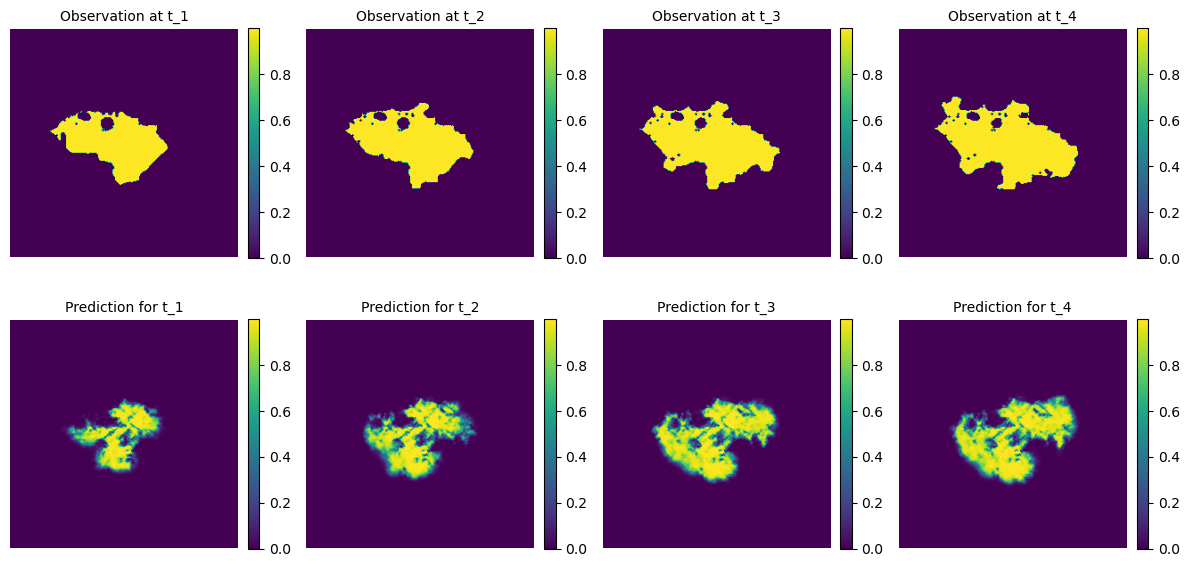

In [24]:
CVAE.visualise_results(4, recon, observations, ts=[0,1,2,3])